In [17]:
# load tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# pip install seaborn

In [68]:
# pip install scikit-learn

In [18]:
print(sns.__version__)

0.11.1


In [19]:
print(tf.__version__)

2.1.0


In [20]:
mnist = tf.keras.datasets.mnist

# fix random seed for reproducibility
np.random.seed(5)
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [21]:
print('datatype :' ,X_train_full.dtype, 'shape :',X_train_full.shape)
print('datatype :' ,X_test.dtype, 'shape :',X_test.shape)

datatype : uint8 shape : (60000, 28, 28)
datatype : uint8 shape : (10000, 28, 28)


In [22]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#scale the test set as well
X_test = X_test/255

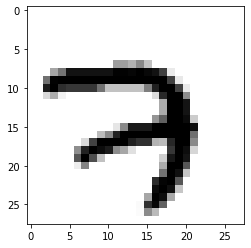

In [23]:
plt.imshow(X_train[0], cmap='binary')
# plt.axis('off')
plt.show()

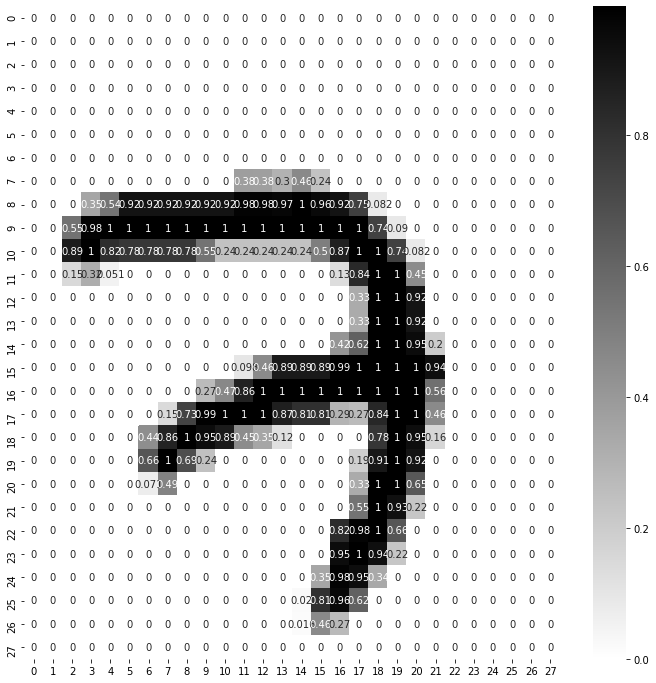

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[0], annot= True, cmap='binary');

In [25]:
# actual value
y_train[0]

7

In [26]:
# Define Keras Model
model = tf.keras.Sequential()
# [Flatten(input_shape=[28,28]),
# Dense(300, activation='relu'),
# Dense(100, activation='relu'),
# Dense(10, activation='relu')]

In [27]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28])) #Input Layer
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
model.layers

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Hidden layer: [300,100,10]
# firstLayer * secondLayer + bias = 
(784*300) , (300*100) , (100*10) +10

(235200, 30000, 1010)

In [34]:
# Total params to be trained -
sum((235200, 30000, 1010))

266210

In [35]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1

True

In [36]:
hidden1.get_weights()

[array([[-0.0689078 ,  0.02001344,  0.00524606, ..., -0.01622719,
         -0.0503048 ,  0.06628567],
        [-0.03819109, -0.03162739,  0.03748294, ...,  0.07242164,
          0.07407367, -0.02829174],
        [ 0.02559032,  0.01255827, -0.01366592, ..., -0.00379735,
         -0.01654403, -0.02624459],
        ...,
        [-0.06009056, -0.05439536,  0.04613515, ..., -0.05205831,
         -0.00092789, -0.05249424],
        [-0.03456061,  0.06163818, -0.00902204, ...,  0.00027141,
          0.01162753, -0.00793199],
        [-0.03163887, -0.00527745,  0.0149688 , ..., -0.03618806,
          0.06263204, -0.00539383]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [37]:
weights, biases = hidden1.get_weights()

In [40]:
print('shape\n', weights.shape, '\n')
weights

shape
 (784, 300) 



array([[-0.0689078 ,  0.02001344,  0.00524606, ..., -0.01622719,
        -0.0503048 ,  0.06628567],
       [-0.03819109, -0.03162739,  0.03748294, ...,  0.07242164,
         0.07407367, -0.02829174],
       [ 0.02559032,  0.01255827, -0.01366592, ..., -0.00379735,
        -0.01654403, -0.02624459],
       ...,
       [-0.06009056, -0.05439536,  0.04613515, ..., -0.05205831,
        -0.00092789, -0.05249424],
       [-0.03456061,  0.06163818, -0.00902204, ...,  0.00027141,
         0.01162753, -0.00793199],
       [-0.03163887, -0.00527745,  0.0149688 , ..., -0.03618806,
         0.06263204, -0.00539383]], dtype=float32)

In [42]:
print('shape : ', biases.shape)

shape :  (300,)


In [43]:
# 3. Compile Keras Model

In [44]:
%%time
loss_function = 'sparse_categorical_crossentropy'
optimizer = 'SGD' # or use with custom learning rate: tf.keras.optimizers.SGD(0.02)
metrics = ['accuracy']

model.compile(loss= loss_function,
             optimizer=optimizer,
             metrics=metrics)

Wall time: 48.9 ms


In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [46]:
%%time
# with validation dataset
valid_set = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                   epochs = 10,
                   validation_data = valid_set,
                   batch_size = 32)
55000/32 ~ 1719

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.6035 - accuracy: 0.8429 - val_loss: 0.3055 - val_accuracy: 0.9186
Epoch 2/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.2871 - accuracy: 0.9187 - val_loss: 0.2397 - val_accuracy: 0.9334
Epoch 3/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2344 - accuracy: 0.9326 - val_loss: 0.2025 - val_accuracy: 0.9420
Epoch 4/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.2007 - accuracy: 0.9426 - val_loss: 0.1811 - val_accuracy: 0.9488
Epoch 5/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.1743 - accuracy: 0.9498 - val_loss: 0.1592 - val_accuracy: 0.9542
Epoch 6/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.1541 - accuracy: 0.9560 - val_loss: 0.1442 - val_accuracy: 0.9606
Epoch 7/10
55000/55000 [==============================] -

In [47]:
# Save Model

In [53]:
import time
import os
#     C:/Users/guptap6/OneDrive - Automatic Data Processing Inc
def saveModel_path(model_dir ='/Documents/jupyter_GL/Practice/DataMining/DM_Project/IndustrySession'):
    os.makedirs(model_dir, exist_ok= True)
    fileName = time.strftime('Model_%Y_%m_%d_%H_%M_%S_.h5')
    model_path = os.path.join(model_dir, fileName)
    print(f'Your model will be saved at the following location\n{model_path}')
    return model_path

In [54]:
unique_path = model.save(saveModel_path())
unique_path

Your model will be saved at the following location
/Documents/jupyter_GL/Practice/DataMining/DM_Project/IndustrySession\Model_2021_06_30_08_55_03_.h5


In [55]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [56]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603458,0.842855,0.305471,0.9186
1,0.287074,0.918673,0.239710,0.9334
2,0.234378,0.932618,0.202502,0.9420
3,0.200720,0.942564,0.181125,0.9488
4,0.174331,0.949836,0.159157,0.9542
5,0.154089,0.955964,0.144247,0.9606
6,0.137787,0.960091,0.131462,0.9620
7,0.124266,0.964582,0.125479,0.9648
8,0.112942,0.967600,0.116040,0.9674
9,0.103443,0.970600,0.109367,0.9680


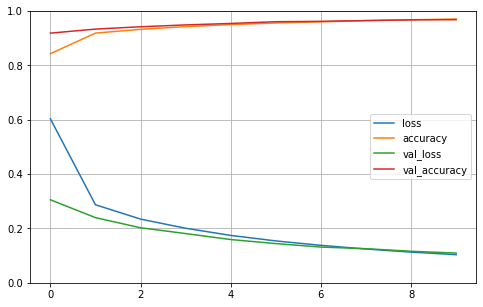

In [57]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
y_pred_valid = np.argmax(model.predict(X_valid), axis=-1)
print('y valid predicted shape', y_pred_valid.shape)

print('y valid true shape', y_valid.shape)

y valid predicted shape (5000,)
y valid true shape (5000,)


In [63]:
print(confusion_matrix(y_pred_valid, y_valid))
print(classification_report(y_pred_valid, y_valid))

[[474   0   2   0   1   0   2   2   0   3]
 [  0 552   3   0   2   1   1   3   3   2]
 [  1   2 471   6   4   2   1   4   2   0]
 [  1   2   2 462   0   6   0   0   3   2]
 [  0   1   2   0 516   0   1   2   2   2]
 [  0   1   0  12   0 416   3   0   5   1]
 [  2   0   0   2   2   3 491   0   1   0]
 [  1   1   3   4   1   0   0 533   0   5]
 [  0   3   5   4   2   3   2   1 445   0]
 [  0   1   0   3   7   3   0   5   1 480]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       484
           1       0.98      0.97      0.98       567
           2       0.97      0.96      0.96       493
           3       0.94      0.97      0.95       478
           4       0.96      0.98      0.97       526
           5       0.96      0.95      0.95       438
           6       0.98      0.98      0.98       501
           7       0.97      0.97      0.97       548
           8       0.96      0.96      0.96       465
           9       0.97     

## 5. Predictions

In [64]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [65]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1, 0], dtype=int64)

In [66]:
y_test_new = y_test[:4]

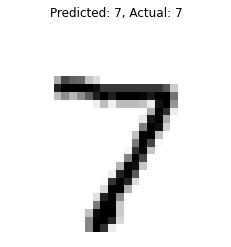

------------------------------------------------------------


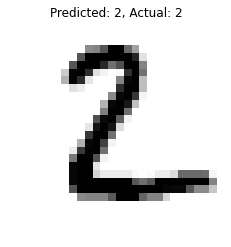

------------------------------------------------------------


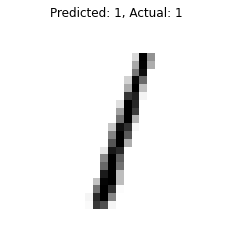

------------------------------------------------------------


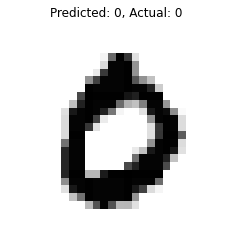

------------------------------------------------------------


In [67]:
for data,pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap='binary')
    plt.title(f'Predicted: {pred}, Actual: {actual}')
    plt.axis('off')
    plt.show()
    print('---'*20)

In [70]:
fashion = tf.keras.datasets.fashion_mnist